In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.svm import SVC
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pandas as pd


def load_data():
    file_path_data = "CATSnDOGS.csv"
    file_path_labels = "Labels.csv"
    delimiter = ","
    df_data = pd.read_csv(file_path_data, delimiter=delimiter, header=0, quotechar='"')
    df_labels = pd.read_csv(
        file_path_labels, delimiter=delimiter, header=0, quotechar='"'
    )
    return df_data, df_labels


def standardize(train_data, test_data):
    sc = StandardScaler()
    train_data = sc.fit_transform(train_data)
    test_data = sc.transform(test_data)
    return train_data, test_data


def load_unified_data():
    file_path_data = "CATSnDOGS.csv"
    file_path_labels = "Labels.csv"
    delimiter = ","
    df_data = pd.read_csv(file_path_data, delimiter=delimiter, header=0, quotechar='"')
    df_labels = pd.read_csv(
        file_path_labels, delimiter=delimiter, header=0, quotechar='"'
    )
    df = pd.concat([df_data, df_labels], axis=1)
    df.rename(columns={"x": "Label"}, inplace=True)
    return df


def plot_image_on_ax(ax, image, pixel_size=64, index=""):
    ax.imshow(
        image.reshape(pixel_size, pixel_size).T,
        cmap="gray",
    )
    ax.set_title(f"{index}", fontsize=30)  # Increase the font size to 16
    ax.axis("off")

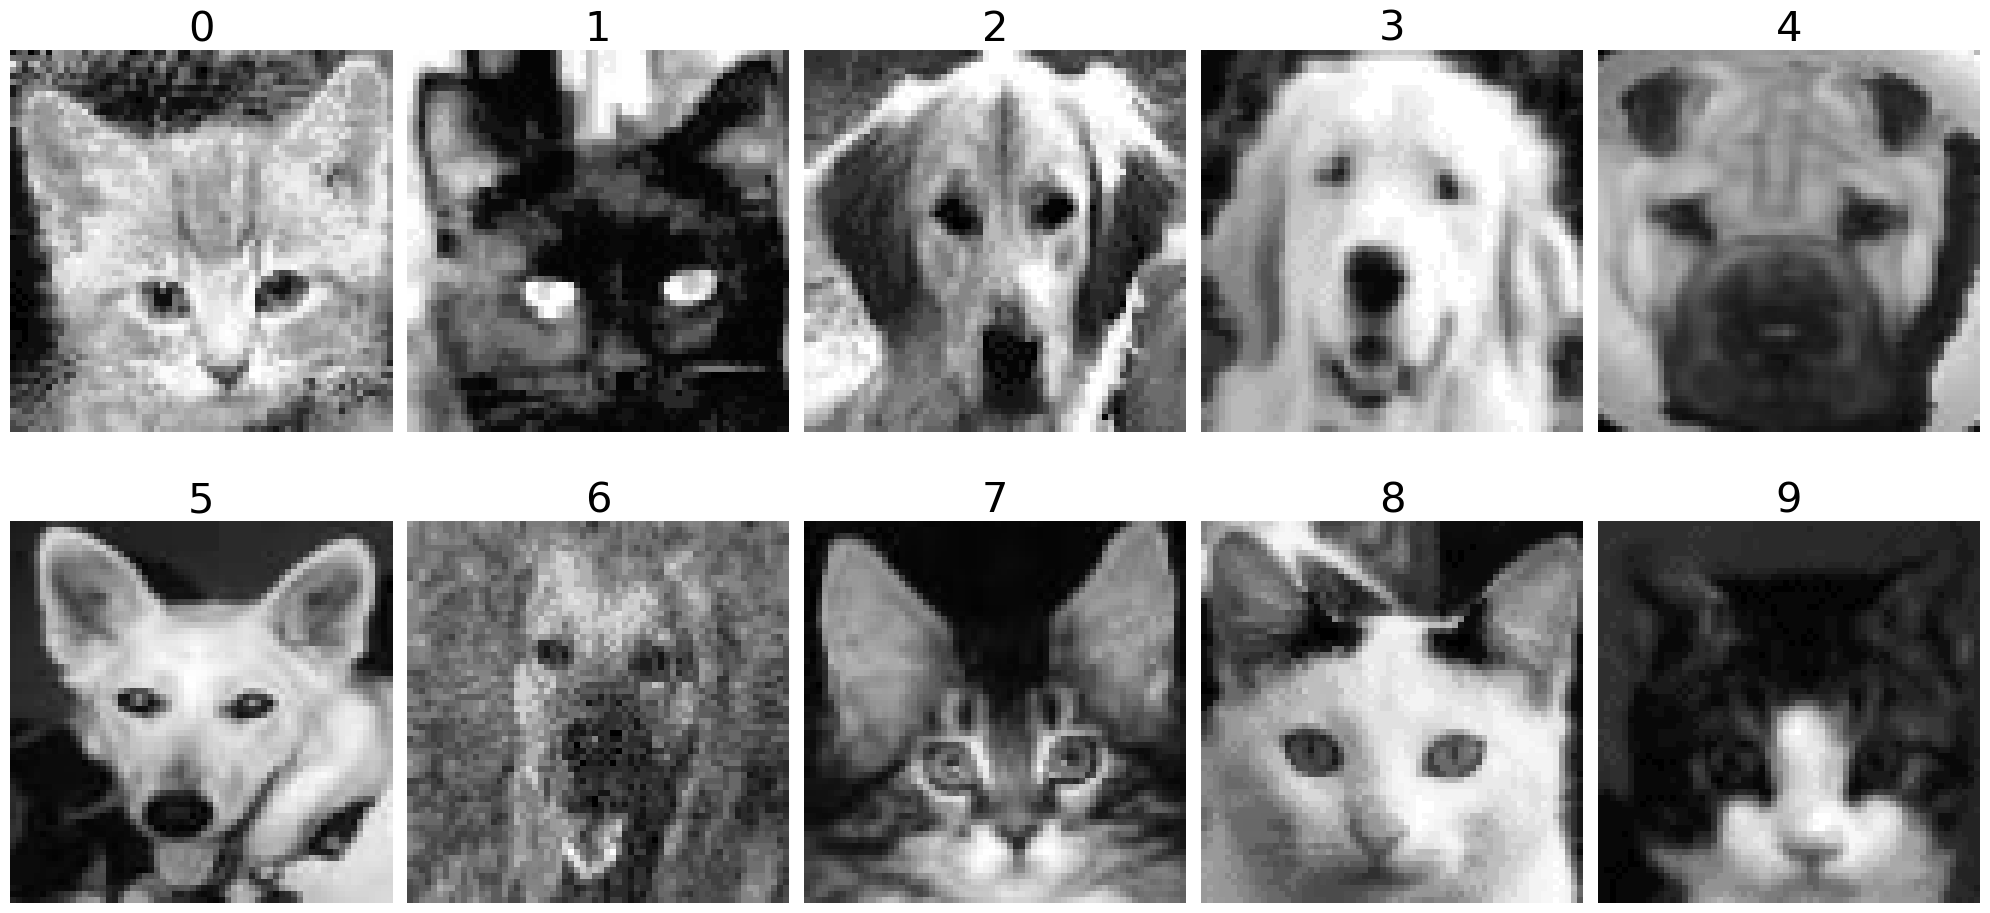

In [32]:
image_data, _ = load_data()
image_data = image_data.to_numpy()
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
for i, ax in enumerate(axes.flatten()):
    plot_image_on_ax(ax, image_data[i], index = i)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [36]:
# Example function to reshape images into blocks
def reshape_into_blocks(images):
    # Reshape each 64x64 image into 16 blocks of 16x16
    # Assuming images.shape == (n_samples, 64, 64)
    n_samples = images.shape[0]
    blocks = images.reshape(n_samples, 4, 16, 4, 16)
    blocks = blocks.swapaxes(2, 3).reshape(n_samples, 16, 256)
    return blocks

reshaped_image_data = reshape_into_blocks(image_data)
print(f"Image data shape: {image_data.shape}")
print(f"Reshaped image data shape: {reshaped_image_data.shape}")

Image data shape: (198, 4096)
Reshaped image data shape: (198, 16, 256)
